### 더미 코딩

In [1]:
import pandas as pd
df = pd.read_excel('data/car.xlsx')
df.tail()

,mileage,model,price,year,my_car_damage,other_car_damage
269,235000,Avante,390,2007,1473730,507260
270,140000,Avante,430,2009,14399366,4592589
271,96757,Avante,390,2006,303080,0
272,113853,Avante,390,2008,320780,1857718
273,91000,Avante,350,2006,3128450,401030


In [2]:
from statsmodels.formula.api import ols
m = ols('price ~ model', df).fit()
m.summary()
# model 은 범주형 변수이므로 연속형으로 변환 필요 -> K3를 1로 했다
# price = 833 + 80 * model[T.K3]
# => Avante 예상가격: 833만원
# => K3 예상가격: 833 + 80 만원
# => 해석: Avante를 기준으로 K3가 얼마나 비싸냐 
# 귀무가설: 기울기 = 0(Avante와 K3의 평균 가격이 같다)
# p = 0.082 > 0.05
# 기각 못함
# Avante와 K3의 가격 차이에 대한 결론을 유보

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.039
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0824
Time:                        13:17:41   Log-Likelihood:                -1977.9
No. Observations:                 274   AIC:                             3960.
Df Residuals:                     272   BIC:                             3967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     833.4146     23.144     36.009      0.000     787.850     878.980
model[T.K3]    80.3970     46.121      1.743      0.082     -10.402     171.196
==============================================================================
Omnibus:                       13.893   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.007
Skew:                           0.573   Prob(JB):                     0.000551
Kurtosis:                       3.002   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
df.groupby('model').agg({'price':'mean'})

,price
model,
Avante,833.414634
K3,913.811594


In [4]:
import pingouin as pg

a = df[df['model']=='Avante']['price']
k = df[df['model']=='K3']['price']
pg.ttest(a, k, correction=False) # 등분산성을 원래 자동으로 해주는데 그걸 False로 하면 p-val이 회귀분석의 결과와 같아짐

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,-1.743179,272,two-sided,0.082432,"[-171.2, 10.4]",0.242614,0.627,0.4119


In [5]:
pg.homoscedasticity(dv='price', group='model', data=df) # 등분산성 검증

,W,pval,equal_var
levene,22.092071,0.000004,False


In [6]:
pg.anova(dv='price', between='model', data=df) # 이분산인데 등분산 방식으로 계산한 결과도 같다

,Source,ddof1,ddof2,F,p-unc,np2
0,model,1,272,3.038673,0.082432,0.011048


In [7]:
# 회귀분석에서 더미코딩을 하면 t검정에서 분산에 대한 보정을 안 한 경우와 결과가 똑같음
# => 사실 회귀분석과 t검정은 똑같은 분석임
# => 회귀분석 > 분산분석 > t검정

In [8]:
# 주행거리를 통제했을 때 
m = ols('price ~ mileage + model', df).fit()
m.summary()
# 주행거리를 통제하지 않았을 때: K3가 Avante보다 80만원 비쌈
#                 통제하면     :                22만원만 비쌈

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     114.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           8.98e-37
Time:                        13:17:42   Log-Likelihood:                -1895.5
No. Observations:                 274   AIC:                             3797.
Df Residuals:                     271   BIC:                             3808.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1251.1755     32.795     38.152      0.000    1186.611    1315.740
model[T.K3]    22.3125     34.425      0.648      0.517     -45.463      90.088
mileage        -0.0052      0.000    -14.950      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.438   Durbin-Watson:                   1.098
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.268
Skew:                           0.064   Prob(JB):                        0.875
Kurtosis:                       3.083   Cond. No.                     2.34e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.34e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
df.groupby('model').agg({'mileage':'mean'})

,mileage
model,
Avante,80294.585366
K3,69130.623188


In [10]:
bs = pd.read_excel('data/birthsmokers.xlsx')
bs.head()
# Wgt: 신생아의 체중
# Gest: 임신 기간(주)
# Smoke: 산모의 흡연여부(yes: 흡연, no: 비흡연)

# 모형 1: Wgt ~ Smoke
# 모형 2: Wgt ~ Smoke + Gest

,Wgt,Gest,Smoke
0,2940,38,yes
1,3130,38,no
2,2420,36,yes
3,2450,34,no
4,2760,39,yes


In [11]:
# Smoke[no] = 0     3066.1250
# Smoke[yes] = 1    3066.1250  -92.5000
# 귀무가설: 흡연자와 비흡연자에 차이가 없다(기울기 = 0)
# p > 0.05 => 귀무가설 기각을 못함
# 흡연자와 비흡연자 산모의 신생아 체중의 차이에 대한 결론 유보

In [12]:
m = ols('Wgt ~ Smoke', bs).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Wgt   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                    0.5599
Date:                Fri, 17 Feb 2023   Prob (F-statistic):              0.460
Time:                        13:17:42   Log-Likelihood:                -231.79
No. Observations:                  32   AIC:                             467.6
Df Residuals:                      30   BIC:                             470.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     3066.1250     87.409     35.078      0.000    2887.613    3244.637
Smoke[T.yes]   -92.5000    123.615     -0.748      0.460    -344.955     159.955
==============================================================================
Omnibus:                        4.607   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                1.915
Skew:                          -0.223   Prob(JB):                        0.384
Kurtosis:                       1.888   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
m = ols('Wgt ~ Smoke + Gest', bs).fit()
m.summary()
# 흡연자, 비흡연자 차이가 있고, 임신주수(Gest)에 따라 체중이 증가
# => 임신 기간을 통제했을 때, 동일 시점을 기준으로 하면 신생아 체중에 차이가 있음
# 그러나 흡연자의 경우에는 임신 기간이 평균적으로 1주 정도 길어지기 때문에 
# 임신 기간을 통제하지 않으면 결과적으로 신생아 체중에는 큰 차이가 없게 됨

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Wgt   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     125.4
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           5.29e-15
Time:                        13:17:42   Log-Likelihood:                -195.82
No. Observations:                  32   AIC:                             397.6
Df Residuals:                      29   BIC:                             402.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept    -2389.5729    349.206     -6.843      0.000   -3103.779   -1675.366
Smoke[T.yes]  -244.5440     41.982     -5.825      0.000    -330.406    -158.682
Gest           143.1003      9.128     15.677      0.000     124.431     161.769
==============================================================================
Omnibus:                        1.946   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.378   Jarque-Bera (JB):                1.162
Skew:                          -0.090   Prob(JB):                        0.559
Kurtosis:                       2.084   Cond. No.                         663.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
# -2389.5729 -244.5440 * 흡연 +  143.1003 * 임신기간

<AxesSubplot:xlabel='Gest', ylabel='Wgt'>

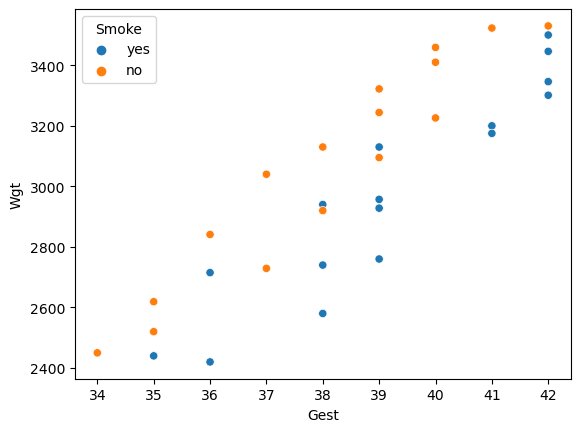

In [15]:
import seaborn as sns
sns.scatterplot(x='Gest', y='Wgt', hue='Smoke', data=bs)

In [16]:
bs.groupby('Smoke').agg('mean')

,Wgt,Gest
Smoke,,
no,3066.125,38.1250
yes,2973.625,39.1875


In [17]:
dp = pd.read_excel('data/depression.xlsx')
dp.tail()
# TRT: 치료제(A, B, C)
# y: 치료 효과 
# age: 나이

,y,age,x2,x3,TRT
31,62,63,1,0,A
32,71,59,0,0,C
33,62,51,0,0,C
34,70,67,1,0,A
35,71,63,0,0,C


In [18]:
m = ols('y ~ TRT', dp).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3.424
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0445
Time:                        13:17:43   Log-Likelihood:                -137.86
No. Observations:                  36   AIC:                             281.7
Df Residuals:                      33   BIC:                             286.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3333      3.359     18.557      0.000      55.500      69.167
TRT[T.B]     -10.4167      4.750     -2.193      0.035     -20.081      -0.752
TRT[T.C]     -11.0833      4.750     -2.333      0.026     -20.748      -1.419
==============================================================================
Omnibus:                        0.553   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.544
Skew:                          -0.267   Prob(JB):                        0.762
Kurtosis:                       2.721   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# y = 62.3333  -10.4167 TRT[B] -11.0833 TRT[C]
# A:= 62.3333  -10.4167     0    -11.0833    0
#   = 62.3333`

# B:= 62.3333  -10.4167     1    -11.0833    0
#   = 62.3333  -10.4167
#   = 51.9166 (통계적 유의, p < 0.05)
# B는 A보다 치료효과 떨어짐

# C: = 62.3333  -10.4167     0    -11.0833    1
#    = 62.3333                    -11.0833
#    = 51.25 (통계적 유의, p < 0.05)
# C도 A보다 치료효과 떨어짐

In [20]:
pg.anova(dv='y', between='TRT', data=dp) # 등분산으로 계산한 분산 분석결과와 회귀분석의 오른쪽 상단 3, 4번째 줄 결과는 같다

,Source,ddof1,ddof2,F,p-unc,np2
0,TRT,2,33,3.424087,0.044539,0.171857


In [21]:
# 회귀 분석은 이분산을 보정하기가 좀 복잡, 분산 분석은 welch_anova 사용하면 간단
pg.homoscedasticity(dv='y', group='TRT', data=dp)

,W,pval,equal_var
levene,9.948595,0.000416,False


In [22]:
pg.welch_anova(dv='y', between='TRT', data=dp)

,Source,ddof1,ddof2,F,p-unc,np2
0,TRT,2,20.10888,6.641878,0.006101,0.171857


In [23]:
pg.pairwise_tukey(data=dp, dv='y', between='TRT') # 왜 tukey로 하셨지...?

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,62.333333,51.916667,10.416667,4.750244,2.192870,0.087287,1.351919
1,A,C,62.333333,51.250000,11.083333,4.750244,2.333214,0.065024,0.825286
2,B,C,51.916667,51.250000,0.666667,4.750244,0.140344,0.989204,0.047622


In [24]:
# 분산 분석의 사후 분석에서는 모든 집단 서로 비교하지만, 회귀 분석에서는 기준(Reference)하고만 비교
# 분산 분석에서는 사후 분석을 할 때 오류의 가능성을 줄이기 위해서 p-val을 보정해서 사용함, 회귀분석에서는 보정 X => 회귀분석에서 유의하게 나온 거은 좀 과장일 가능성 O

# 언제 무엇을 쓰나요?
# 회귀분석: 예측이나 통계적 통제를 주로하고, 부가적으로 가설검정도 하고 싶다.
# 분산분석: 가설검정을 정확하게 하고 싶고, 예측이나 통계적 통제는 관심 없다. (단, 실험적 통제 필요)

In [25]:
m = ols('price ~ model', df).fit()
m.summary()  # Avante가 기준 833, K3는 그것보다 +80만원

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.039
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0824
Time:                        13:17:43   Log-Likelihood:                -1977.9
No. Observations:                 274   AIC:                             3960.
Df Residuals:                     272   BIC:                             3967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     833.4146     23.144     36.009      0.000     787.850     878.980
model[T.K3]    80.3970     46.121      1.743      0.082     -10.402     171.196
==============================================================================
Omnibus:                       13.893   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.007
Skew:                           0.573   Prob(JB):                     0.000551
Kurtosis:                       3.002   Cond. No.                         2.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
m = ols('price ~ C(model, Treatment("K3"))', df).fit()
m.summary()  # K3가 기준 913, Avante는 그것보다 -80만원 => 집단이 2개일 때는 기준(reference)을 바꿔도 분석결과에 사실상 차이가 없다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.039
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0824
Time:                        13:17:43   Log-Likelihood:                -1977.9
No. Observations:                 274   AIC:                             3960.
Df Residuals:                     272   BIC:                             3967.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             913.8116     39.893     22.906      0.000     835.273     992.350
C(model, Treatment("K3"))[T.Avante]   -80.3970     46.121     -1.743      0.082    -171.196      10.402
==============================================================================
Omnibus:                       13.893   Durbin-Watson:                   0.528
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.007
Skew:                           0.573   Prob(JB):                     0.000551
Kurtosis:                       3.002   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
m = ols('y ~ TRT', dp).fit()
m.summary()  # A를 기준 62, B는 A보다 -10, C는 A보다 -11이다 (B와 C의 비교는 없음)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3.424
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0445
Time:                        13:17:43   Log-Likelihood:                -137.86
No. Observations:                  36   AIC:                             281.7
Df Residuals:                      33   BIC:                             286.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3333      3.359     18.557      0.000      55.500      69.167
TRT[T.B]     -10.4167      4.750     -2.193      0.035     -20.081      -0.752
TRT[T.C]     -11.0833      4.750     -2.333      0.026     -20.748      -1.419
==============================================================================
Omnibus:                        0.553   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.544
Skew:                          -0.267   Prob(JB):                        0.762
Kurtosis:                       2.721   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
m = ols('y ~ C(TRT, Treatment("C"))', dp).fit()
m.summary()  # C를 기준 51, A는 C보다 +11, B는 C보다 +0.66이다 (A와 B의 비교는 없음) => 회귀 분석에서는 뭘 기준으로 정할 지도 생각해야 함

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     3.424
Date:                Fri, 17 Feb 2023   Prob (F-statistic):             0.0445
Time:                        13:17:43   Log-Likelihood:                -137.86
No. Observations:                  36   AIC:                             281.7
Df Residuals:                      33   BIC:                             286.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      51.2500      3.359     15.258      0.000      44.416      58.084
C(TRT, Treatment("C"))[T.A]    11.0833      4.750      2.333      0.026       1.419      20.748
C(TRT, Treatment("C"))[T.B]     0.6667      4.750      0.140      0.889      -8.998      10.331
==============================================================================
Omnibus:                        0.553   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.758   Jarque-Bera (JB):                0.544
Skew:                          -0.267   Prob(JB):                        0.762
Kurtosis:                       2.721   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 모형 선택

In [29]:
m1 = ols('price ~ mileage + model + year + my_car_damage', df).fit()
m1.summary() # R-squared:     0.776 Adj. R-squared:     0.773   AIC:     3559  BIC:     3577

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     233.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           3.63e-86
Time:                        13:17:43   Log-Likelihood:                -1774.3
No. Observations:                 274   AIC:                             3559.
Df Residuals:                     269   BIC:                             3577.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.577e+05   9520.412    -16.559      0.000   -1.76e+05   -1.39e+05
model[T.K3]     -35.9920     22.465     -1.602      0.110     -80.221       8.237
mileage          -0.0023      0.000     -8.535      0.000      -0.003      -0.002
year             78.8444      4.723     16.695      0.000      69.546      88.142
my_car_damage -1.802e-05   3.29e-06     -5.480      0.000   -2.45e-05   -1.15e-05
==============================================================================
Omnibus:                       10.267   Durbin-Watson:                   1.532
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.775
Skew:                           0.320   Prob(JB):                      0.00168
Kurtosis:                       3.843   Cond. No.                     3.83e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.83e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
m2 = ols('price ~ mileage + model + year + my_car_damage + other_car_damage', df).fit()
m2.summary() # R-squared:     0.783 Adj. R-squared:     0.779   AIC:     3552  BIC:     3574

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     193.2
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.14e-86
Time:                        13:17:43   Log-Likelihood:                -1770.2
No. Observations:                 274   AIC:                             3552.
Df Residuals:                     268   BIC:                             3574.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.523e+05   9586.614    -15.885      0.000   -1.71e+05   -1.33e+05
model[T.K3]        -32.7958     22.205     -1.477      0.141     -76.514      10.923
mileage             -0.0024      0.000     -8.958      0.000      -0.003      -0.002
year                76.1874      4.755     16.022      0.000      66.825      85.550
my_car_damage    -1.619e-05   3.31e-06     -4.894      0.000   -2.27e-05   -9.68e-06
other_car_damage -6.073e-06   2.14e-06     -2.836      0.005   -1.03e-05   -1.86e-06
==============================================================================
Omnibus:                       11.358   Durbin-Watson:                   1.553
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               14.249
Skew:                           0.347   Prob(JB):                     0.000805
Kurtosis:                       3.875   Cond. No.                     5.46e+09
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.46e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# => 결론: other_car_damage는 추가하는 것이 나음

In [33]:
iq = pd.read_excel('data/iqsize.xlsx')

m1 = ols('PIQ ~ Brain + Height', iq).fit()
m1.summary() # R-squared:     0.295  Adj. R-squared:     0.255 AIC:     336.5 BIC:     341.4

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     7.321
Date:                Fri, 17 Feb 2023   Prob (F-statistic):            0.00221
Time:                        13:18:00   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             336.5
Df Residuals:                      35   BIC:                             341.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.2757     55.867      1.992      0.054      -2.141     224.692
Brain          2.0606      0.547      3.770      0.001       0.951       3.170
Height        -2.7299      0.993     -2.749      0.009      -4.746      -0.714
==============================================================================
Omnibus:                        1.377   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.087
Skew:                           0.408   Prob(JB):                        0.581
Kurtosis:                       2.860   Cond. No.                     2.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
m2 = ols('PIQ ~ Brain + Height + Weight', iq).fit()
m2.summary() # R-squared:     0.295  Adj. R-squared:     0.233 AIC:     338.5 BIC:     345.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    PIQ   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     4.741
Date:                Fri, 17 Feb 2023   Prob (F-statistic):            0.00722
Time:                        13:18:04   Log-Likelihood:                -165.25
No. Observations:                  38   AIC:                             338.5
Df Residuals:                      34   BIC:                             345.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    111.3536     62.971      1.768      0.086     -16.619     239.326
Brain          2.0604      0.563      3.657      0.001       0.915       3.205
Height        -2.7319      1.229     -2.222      0.033      -5.230      -0.233
Weight         0.0006      0.197      0.003      0.998      -0.400       0.401
==============================================================================
Omnibus:                        1.379   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.502   Jarque-Bera (JB):                1.088
Skew:                           0.409   Prob(JB):                        0.580
Kurtosis:                       2.859   Cond. No.                     3.73e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# => 결론: Weight는 안 넣는 것이 나음

### 교차검증

In [36]:
from sklearn.model_selection import train_test_split

In [40]:
# 데이터 분할
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42) # random_state는 아무 숫자나 들어가도 되는데 랜덤하게 숫자를 만드는 공식에 넣을 숫자임 => 이렇게 돌려야 매번 결과값이 바뀌지 않음

In [43]:
display(train_df), display(test_df)

,mileage,model,price,year,my_car_damage,other_car_damage
10,59437,K3,1490,2015,0,0
256,132000,Avante,310,2010,8915310,1273877
120,9000,Avante,1820,2017,878760,793850
33,68678,K3,870,2013,2292151,670820
173,21750,Avante,1100,2013,0,0
...,...,...,...,...,...,...
188,60000,Avante,470,2010,3629616,214476
71,99602,Avante,1099,2016,0,0
106,37152,Avante,1720,2016,0,0
270,140000,Avante,430,2009,14399366,4592589


,mileage,model,price,year,my_car_damage,other_car_damage
30,74470,K3,1100,2014,1469233,1090910
164,43179,Avante,930,2014,1115240,12410650
194,69258,Avante,790,2013,747078,416649
125,42500,Avante,1290,2017,903500,0
265,103787,Avante,380,2008,9021247,6336346
232,145000,Avante,500,2012,1018638,0
259,47743,Avante,220,2006,6249300,55108900
201,123503,Avante,499,2011,5984535,1259780
255,157459,Avante,380,2006,567290,0
216,92644,Avante,599,2011,289680,22966108


(None, None)

In [47]:
# 모델 1 잔차 분산
from sklearn.metrics import mean_squared_error
m1 = ols('price ~ mileage + model + year + my_car_damage', train_df).fit()
y_pred = m1.predict(test_df)
mean_squared_error(test_df.price, y_pred)

21322.337589081642

In [48]:
# 모델 2 잔차 분산
m2 = ols('price ~ mileage + model + year + my_car_damage + other_car_damage', train_df).fit()
y_pred = m2.predict(test_df)
mean_squared_error(test_df.price, y_pred)
# => 결론 잔차 분산이 커졌으므로 예측이 부정확 해졌다고 불 수 있으니 other_car_damage 변수는 빼는 것이 더 좋다.

26416.54558613024

### 다중공선성

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [65]:
# 다중공선성이 있으면 분산팽창계수가 커짐
m = ols('price ~ mileage + year + model + my_car_damage + other_car_damage', df)

In [66]:
for i, x in enumerate(m.exog_names):
    print(x, # 변수이름
          variance_inflation_factor(m.exog, i)) # 분산팽창계수(5를 넘으면 변수를 제외)

Intercept 1028714.1767359568
model[T.K3] 1.039844645875005
mileage 1.5109304702701838
year 1.6908930263966475
my_car_damage 1.158363117841209
other_car_damage 1.1083346150186517


In [67]:
# 분산팽창계수 dict로 만들기
{
    x: variance_inflation_factor(m.exog, i)
    for i, x in enumerate(m.exog_names)
}

{'Intercept': 1028714.1767359568,
 'model[T.K3]': 1.039844645875005,
 'mileage': 1.5109304702701838,
 'year': 1.6908930263966475,
 'my_car_damage': 1.158363117841209,
 'other_car_damage': 1.1083346150186517}

### 잔차 분석

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           5.81e-38
Time:                        14:39:50   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

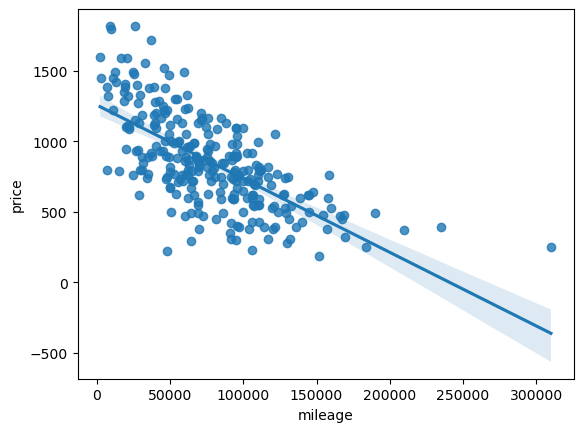

In [74]:
sns.regplot(x='mileage', y='price', data=df)

m = ols('price ~ mileage', df).fit()
m.summary()

<AxesSubplot:ylabel='Count'>

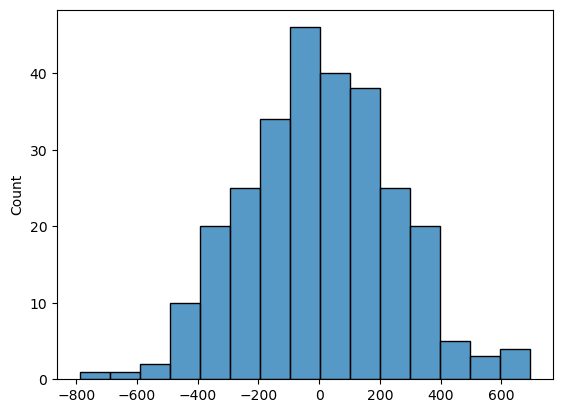

In [75]:
# 잔차의 히스토그램
r = m.resid
sns.histplot(r) 

C:\Users\mook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mileage'>

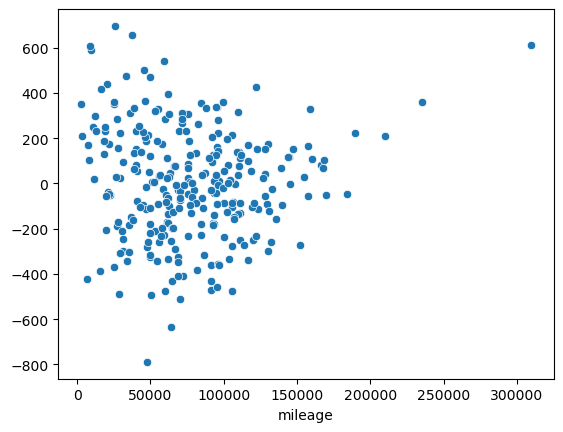

In [78]:
# 독립변수와 잔차의 산점도
sns.scatterplot(df.mileage, r)

### 변수 변형

In [80]:
import numpy as np 
m1 = ols('price ~ mileage', df).fit() # price = 1258 - 0.0052 mileage
m1.summary() # R제곱 0.457

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                     229.1
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           5.81e-38
Time:                        15:10:06   Log-Likelihood:                -1895.7
No. Observations:                 274   AIC:                             3795.
Df Residuals:                     272   BIC:                             3803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1258.7668     30.599     41.137      0.000    1198.526    1319.008
mileage       -0.0052      0.000    -15.136      0.000      -0.006      -0.005
==============================================================================
Omnibus:                        0.258   Durbin-Watson:                   1.101
Prob(Omnibus):                  0.879   Jarque-Bera (JB):                0.108
Skew:                           0.032   Prob(JB):                        0.947
Kurtosis:                       3.074   Cond. No.                     1.83e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [81]:
m2 = ols('price ~ np.log(mileage)', df).fit() # price = 4465 - 326 log(mileage)
m2.summary()
# R제곱이 0.479로 좋아졌음을 확인 할 수 있다.
# => m2가 m1보다 예측을 더 잘함
# 독립변수의 개수가 같으므로 비교해도 됨
# 교차검증은 해볼 수 있음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.479
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     249.6
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           2.44e-40
Time:                        15:10:24   Log-Likelihood:                -1890.2
No. Observations:                 274   AIC:                             3784.
Df Residuals:                     272   BIC:                             3792.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4465.5337    229.085     19.493      0.000    4014.529    4916.539
np.log(mileage)  -326.3958     20.660    -15.798      0.000    -367.070    -285.722
==============================================================================
Omnibus:                        0.838   Durbin-Watson:                   1.001
Prob(Omnibus):                  0.658   Jarque-Bera (JB):                0.566
Skew:                           0.002   Prob(JB):                        0.754
Kurtosis:                       3.223   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
# I 함수를 이용해 변수를 합산하여 새로운 변수로 분석
m = ols('price ~ my_car_damage + other_car_damage', df).fit()
m.summary() # 수정R제곱  0.191  AIC: 3905  BIC: 3915

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.197
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     33.33
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.14e-13
Time:                        15:25:06   Log-Likelihood:                -1949.3
No. Observations:                 274   AIC:                             3905.
Df Residuals:                     271   BIC:                             3915.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          968.9866     22.954     42.215      0.000     923.797    1014.177
my_car_damage     -4.12e-05   6.06e-06     -6.799      0.000   -5.31e-05   -2.93e-05
other_car_damage -1.094e-05   4.01e-06     -2.728      0.007   -1.88e-05   -3.04e-06
==============================================================================
Omnibus:                        6.192   Durbin-Watson:                   0.680
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                6.076
Skew:                           0.363   Prob(JB):                       0.0479
Kurtosis:                       3.077   Cond. No.                     6.84e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.84e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
m = ols('price ~ I(my_car_damage + other_car_damage)', df).fit()
m.summary()  # 수정R제곱  0.152  AIC: 3917  BIC: 3924
# => 결론 합산하지 않고 따로 하는 게 더 낫다

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     50.06
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.26e-11
Time:                        15:25:12   Log-Likelihood:                -1956.3
No. Observations:                 274   AIC:                             3917.
Df Residuals:                     272   BIC:                             3924.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             941.2977     22.263     42.280      0.000     897.467     985.128
I(my_car_damage + other_car_damage) -2.123e-05      3e-06     -7.076      0.000   -2.71e-05   -1.53e-05
==============================================================================
Omnibus:                        7.330   Durbin-Watson:                   0.637
Prob(Omnibus):                  0.026   Jarque-Bera (JB):                7.384
Skew:                           0.402   Prob(JB):                       0.0249
Kurtosis:                       3.025   Cond. No.                     8.93e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.93e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='speed', ylabel='dist'>

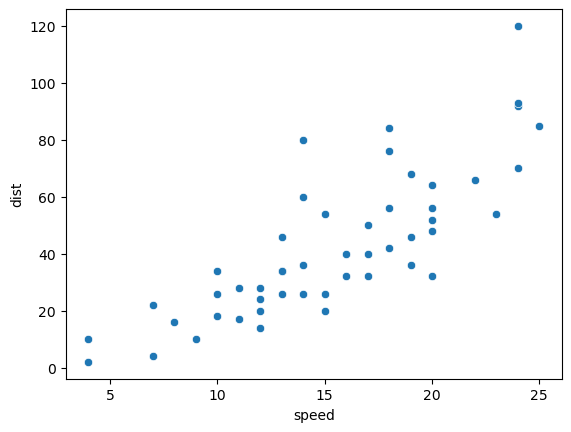

In [85]:
# 2차항의 추가
sp = pd.read_excel('data/speed.xlsx')
sns.scatterplot(x='speed', y='dist', data=sp) # 운동에너지는 속도^2 이므로 선형으로는 좀 안 맞다.

In [87]:
ols('dist ~ speed', sp).fit().summary() # 수정 R제곱: 0.644, AIC: 417.2, BIC: 421.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     89.57
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.49e-12
Time:                        15:33:35   Log-Likelihood:                -206.58
No. Observations:                  50   AIC:                             417.2
Df Residuals:                      48   BIC:                             421.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -17.5791      6.758     -2.601      0.012     -31.168      -3.990
speed          3.9324      0.416      9.464      0.000       3.097       4.768
==============================================================================
Omnibus:                        8.975   Durbin-Watson:                   1.676
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.189
Skew:                           0.885   Prob(JB):                       0.0167
Kurtosis:                       3.893   Cond. No.                         50.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
ols('dist ~ I(speed**2) + speed', sp).fit().summary() # 수정 R제곱: 0.653, AIC: 416.8, BIC: 422.5 
# 수정 R제곱과 AIC는 개선되고, BIC는 악화된
# dis = 2.4701 + 0.1 speed**2 + 0.9133 speed
# => 2차함수와 1차함수 차이를 비교하려면 속도가 높을 때 가 많이 차이나는데 우리 자료는 과속한 자료가 없어서 얼마 차이가 안 남

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   dist   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     47.14
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           5.85e-12
Time:                        15:33:06   Log-Likelihood:                -205.39
No. Observations:                  50   AIC:                             416.8
Df Residuals:                      47   BIC:                             422.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.4701     14.817      0.167      0.868     -27.338      32.278
I(speed ** 2)     0.1000      0.066      1.515      0.136      -0.033       0.233
speed             0.9133      2.034      0.449      0.656      -3.179       5.006
==============================================================================
Omnibus:                       11.173   Durbin-Watson:                   1.762
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.061
Skew:                           0.991   Prob(JB):                      0.00396
Kurtosis:                       4.173   Cond. No.                     2.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [89]:
# 절편의 이동
ols('price ~ I(year-2010)', df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     597.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.39e-70
Time:                        16:21:08   Log-Likelihood:                -1820.2
No. Observations:                 274   AIC:                             3644.
Df Residuals:                     272   BIC:                             3652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        505.0926     18.172     27.794      0.000     469.316     540.869
I(year - 2010)   106.4745      4.357     24.439      0.000      97.897     115.052
==============================================================================
Omnibus:                        9.748   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.774
Skew:                           0.447   Prob(JB):                      0.00754
Kurtosis:                       3.236   Cond. No.                         6.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
ols('price ~ year', df).fit().summary() # 서기 0년이 절편의 값이 된다. => 해석하기 불편함

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     597.3
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.39e-70
Time:                        16:21:19   Log-Likelihood:                -1820.2
No. Observations:                 274   AIC:                             3644.
Df Residuals:                     272   BIC:                             3652.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.135e+05   8771.400    -24.341      0.000   -2.31e+05   -1.96e+05
year         106.4745      4.357     24.439      0.000      97.897     115.052
==============================================================================
Omnibus:                        9.748   Durbin-Watson:                   1.525
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.774
Skew:                           0.447   Prob(JB):                      0.00754
Kurtosis:                       3.236   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 상호작용

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6455.
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          6.62e-104
Time:                        16:38:50   Log-Likelihood:                -139.75
No. Observations:                 100   AIC:                             285.5
Df Residuals:                      97   BIC:                             293.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.3857      0.370     55.077      0.000      19.651      21.120
x              1.9659      0.032     60.798      0.000       1.902       2.030
m            -17.1611      0.201    -85.275      0.000     -17.561     -16.762
==============================================================================
Omnibus:                        2.130   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.613
Skew:                          -0.146   Prob(JB):                        0.446
Kurtosis:                       3.549   Cond. No.                         40.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

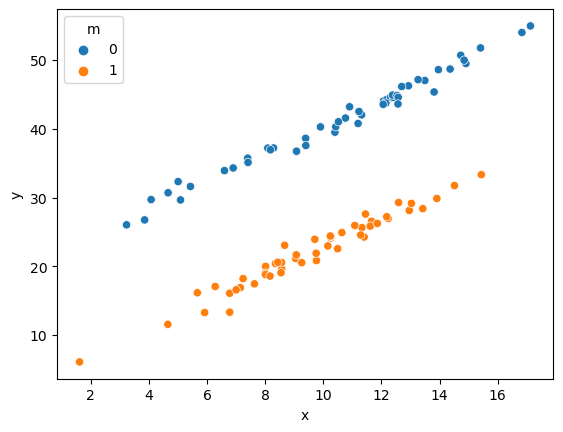

In [91]:
# 절편만 다른 경우
d1 = pd.read_excel('data/diff_intercept.xlsx')
sns.scatterplot(x='x', y='y', hue='m', data=d1)
ols('y ~ x + m', d1).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 3.229e+04
Date:                Fri, 17 Feb 2023   Prob (F-statistic):          1.09e-137
Time:                        16:39:06   Log-Likelihood:                -155.10
No. Observations:                 100   AIC:                             316.2
Df Residuals:                      97   BIC:                             324.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0352      0.402      0.088      0.930      -0.762       0.832
x              2.0266      0.037     54.283      0.000       1.952       2.101
x:m            5.4842      0.023    243.605      0.000       5.439       5.529
==============================================================================
Omnibus:                        1.674   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.433   Jarque-Bera (JB):                1.116
Skew:                          -0.163   Prob(JB):                        0.572
Kurtosis:                       3.402   Cond. No.                         41.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

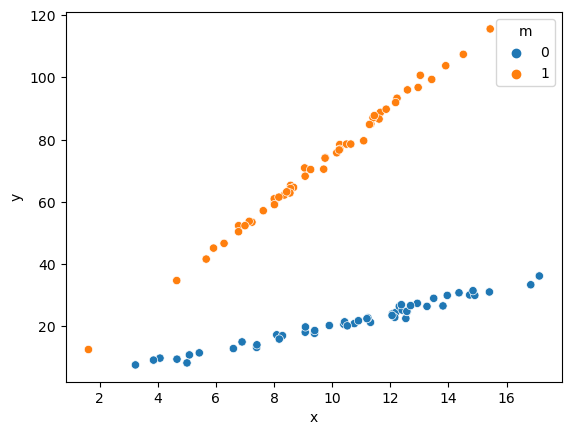

In [93]:
# 기울기가 다른 경우
d2 = pd.read_excel('data/diff_slope.xlsx')
sns.scatterplot(x='x', y='y', hue='m', data=d2)
ols('y ~ x + x:m', d2).fit().summary()

### 퀴즈

In [95]:
bp = pd.read_excel('data/bloodpress.xlsx')
bp

,Pt,BP,Age,Weight,BSA,Dur,Pulse,Stress
0,1,105,47,85.4,1.75,5.1,63,33
1,2,115,49,94.2,2.10,3.8,70,14
2,3,116,49,95.3,1.98,8.2,72,10
3,4,117,50,94.7,2.01,5.8,73,99
4,5,112,51,89.4,1.89,7.0,72,95
5,6,121,48,99.5,2.25,9.3,71,10
6,7,121,49,99.8,2.25,2.5,69,42
7,8,110,47,90.9,1.90,6.2,66,8
8,9,110,49,89.2,1.83,7.1,69,62
9,10,114,48,92.7,2.07,5.6,64,35


In [97]:
m1 = ols('BP ~ Weight', bp).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     166.9
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.53e-10
Time:                        17:03:35   Log-Likelihood:                -38.409
No. Observations:                  20   AIC:                             80.82
Df Residuals:                      18   BIC:                             82.81
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2053      8.663      0.255      0.802     -15.996      20.406
Weight         1.2009      0.093     12.917      0.000       1.006       1.396
==============================================================================
Omnibus:                        9.231   Durbin-Watson:                   1.641
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.566
Skew:                           1.157   Prob(JB):                       0.0375
Kurtosis:                       4.590   Cond. No.                     2.07e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
m2 = ols('BP ~ Weight + Age', bp).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     978.2
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           2.81e-18
Time:                        17:04:02   Log-Likelihood:                -14.157
No. Observations:                  20   AIC:                             34.31
Df Residuals:                      17   BIC:                             37.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -16.5794      3.007     -5.513      0.000     -22.925     -10.234
Weight         1.0330      0.031     33.154      0.000       0.967       1.099
Age            0.7083      0.054     13.235      0.000       0.595       0.821
==============================================================================
Omnibus:                        0.989   Durbin-Watson:                   1.688
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.768
Skew:                           0.101   Prob(JB):                        0.681
Kurtosis:                       2.061   Cond. No.                     2.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [99]:
m3 = ols('BP ~ np.log(Weight) + Age', bp).fit()
m3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     BP   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     828.5
Date:                Fri, 17 Feb 2023   Prob (F-statistic):           1.14e-17
Time:                        17:04:28   Log-Likelihood:                -15.803
No. Observations:                  20   AIC:                             37.61
Df Residuals:                      17   BIC:                             40.59
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       -355.8281     13.379    -26.597      0.000    -384.055    -327.601
np.log(Weight)    96.0820      3.151     30.493      0.000      89.434     102.730
Age                0.7064      0.058     12.149      0.000       0.584       0.829
==============================================================================
Omnibus:                        1.356   Durbin-Watson:                   1.572
Prob(Omnibus):                  0.508   Jarque-Bera (JB):                0.863
Skew:                          -0.017   Prob(JB):                        0.649
Kurtosis:                       1.983   Cond. No.                     5.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""